# Imports

In [17]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
from PIL import Image

# Definitions

In [18]:
img_file = (
    "/Users/richardcollins/palette-able-images/data/test_images/Emma.png"
)

# Functions

In [19]:
def resize_image_cv2(img_file, dims):
    img = cv2.imread(img_file)
    print("Original Dimensions: {}".format(img.shape))
    resized = cv2.resize(img, dims, interpolation=cv2.INTER_AREA)
    print("Resized Dimensions: {}".format(resized.shape))
    return resized


def resize_image_pillow(img, dims):
    print("Original Dimensions: {}".format(img.size))
    resized = img.resize(dims)
    print("Resized Dimensions: {}".format(resized.size))
    return resized


def reduce_colours(img, nColours):
    image_pbn = img.convert("P", palette=Image.ADAPTIVE, colors=nColours)
    # image_pbn.save("/Users/richardcollins/Desktop/jonny/images/jonny_cropped_resized_pbn.png")
    # image_pbn.show()
    return image_pbn


def get_palette_info(img):
    palette_colours = img.getcolors()
    # print(palette_colours)
    imgRGB = img.convert("RGB")
    rgb_colours = imgRGB.getcolors()
    # print(rgb_colours)
    palette_info_dict = {c: [] for c in ["colourID", "frequency", "r", "g", "b"]}
    for palette_freq, palette_colour in palette_colours:
        for rgb_freq, rgb_colour in rgb_colours:
            if palette_freq != rgb_freq:
                continue

            palette_info_dict["colourID"].append(palette_colour)
            palette_info_dict["frequency"].append(rgb_freq)
            for i, colour in enumerate(["r", "g", "b"]):
                palette_info_dict[colour].append(rgb_colour[i])
    palette_info_df = pd.DataFrame(palette_info_dict)
    ### Generate example images
    """w, h = 512, 512
    for palette_colour, rgb_colour in palette_info.items():
        r, g, b = rgb_colour[0], rgb_colour[1], rgb_colour[2]
        data = np.zeros((h, w, 3), dtype=np.uint8)
        data[:, :] = [r, g, b]  # red patch in upper left
        img = Image.fromarray(data, "RGB")
        img.save(
            "/Users/richardcollins/Desktop/jonny/images/palette/colour{0}_rgb{1}.png".format(
                palette_colour, rgb_colour
            )
        )"""
    return palette_info_df


def quantise_to_palette(img, palette):
    """Quantize image to a given palette.

    The input image is expected to be a PIL Image.
    The palette is expected to be a list of no more than 256 R,G,B values."""

    e = len(palette)
    assert e > 0, "Palette unexpectedly short"
    assert e <= 768, "Palette unexpectedly long"
    assert e % 3 == 0, "Palette not multiple of 3, so not RGB"

    # Make tiny, 1x1 new palette image
    p = Image.new("P", (1, 1))

    # Zero-pad the palette to 256 RGB colours, i.e. 768 values and apply to image
    palette += (768 - e) * [0]
    p.putpalette(palette)

    # Now quantize input image to the same palette as our little image
    return img.convert("RGB").quantize(palette=p)

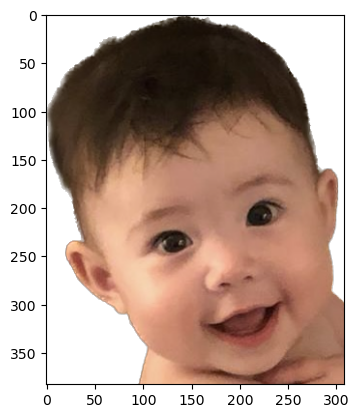

In [20]:
original = Image.open(img_file)
plt.imshow(original)
plt.show()

In [21]:
resized = resize_image_pillow(img=original, dims=(100, 128))

Original Dimensions: (308, 383)
Resized Dimensions: (100, 128)


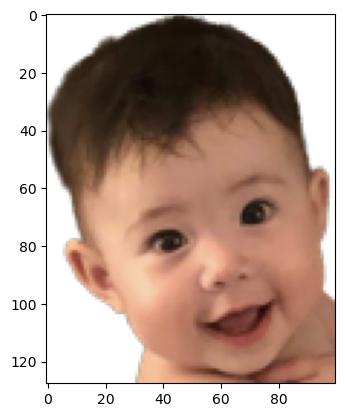

In [22]:
plt.imshow(resized)
plt.show()

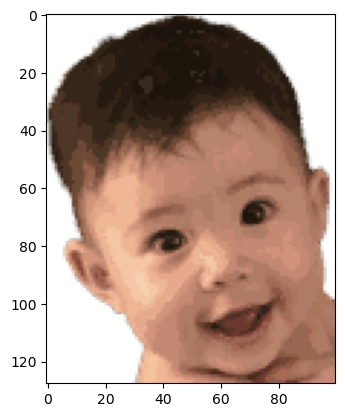

In [27]:
image_pbn = reduce_colours(img=resized, nColours=60)
plt.imshow(image_pbn)
plt.show()

In [24]:
get_palette_info(img=image_pbn).sort_values("frequency", ascending=False)

,colourID,frequency,r,g,b
0,0,3894,1,1,0
1,1,2637,165,112,90
2,2,2331,40,28,17
3,3,1228,202,142,116
4,4,1049,185,132,108
5,5,994,232,174,143
6,6,667,82,51,37


In [25]:
np.array(image_pbn.getpalette()).reshape(256,3)

array([[  1,   1,   0],
       [165, 112,  90],
       [ 40,  28,  17],
       [202, 142, 116],
       [185, 132, 108],
       [232, 174, 143],
       [ 82,  51,  37],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0

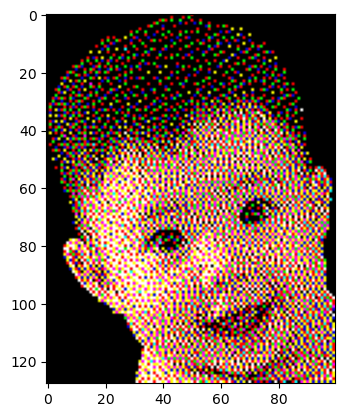

In [26]:
new_palette = list(
    np.array([[0, 0, 0], [0, 0, 225], [0, 255, 0], [255, 0, 0], [0, 255, 255], [255, 0, 255], [255, 255, 0], [255, 255, 255]]).flatten()
)
image_new_palette = quantise_to_palette(img=resized, palette=new_palette)
plt.imshow(image_new_palette)
plt.show()

In [29]:
get_palette_info(img=image_new_palette)

,colourID,frequency,r,g,b
0,0,5245,0,0,0
1,1,1012,0,0,225
2,2,719,0,255,0
3,3,1757,255,0,0
4,4,232,0,255,255
5,5,849,255,0,255
6,6,1830,255,255,0
7,7,1156,255,255,255


In [38]:
pd.DataFrame(np.array(image_new_palette))

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0,0,0,0,0,0,0,0,0,0,...,3,6,1,6,1,6,3,7,0,7
124,0,0,0,0,0,0,0,0,0,0,...,6,1,6,3,3,4,3,7,3,6
125,0,0,0,0,0,0,0,0,0,0,...,2,3,1,6,1,6,5,2,5,6
126,0,0,0,0,0,0,0,0,0,0,...,1,6,3,7,3,7,3,6,7,3
